La imagen se cargó correctamente y se convirtió en gris


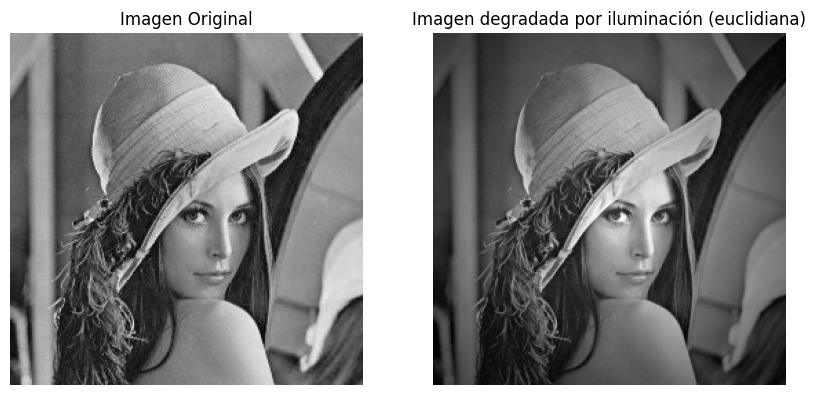

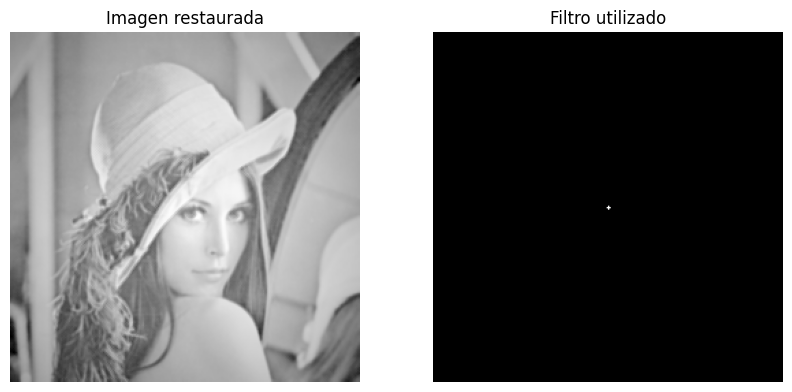

In [24]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

ruta_imagen = 'Lenna.png'
ruta_imagen_degradada = 'imagen_observada.png'
imagen_gris = cv2.imread(ruta_imagen)  #cargando la imagen
imagen_degradada=cv2.imread(ruta_imagen_degradada)


if imagen is not None:
    imagen_gris = cv2.cvtColor(imagen_gris, cv2.COLOR_BGR2GRAY)
    print("La imagen se cargó correctamente y se convirtió en gris")
    alto, ancho = imagen_gris.shape



# Crear un filtro de paso alto
filas, columnas = imagen_gris.shape[:2]
centro_fila, centro_columna = filas // 2, columnas // 2
filtro_paso_alto = np.zeros((filas, columnas), np.float32)
filtro_paso_alto[128,128]=1
filtro_paso_alto[127,128]=1
filtro_paso_alto[129,128]=1
filtro_paso_alto[128,127]=1
filtro_paso_alto[128,129]=1
filtro=filtro_paso_alto


def restauracion(imagen):
  imagen1 = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen2 = imagen1.astype(np.float32)
  imagen_FPA = cv2.filter2D(np.log1p(imagen2), -1, filtro)
  imagen_FPA_normalizado = cv2.normalize(imagen_FPA,
                                         None, alpha=0, beta=1,
                                         norm_type=cv2.NORM_MINMAX)
  imagen_aprox = np.expm1( imagen_FPA_normalizado)
  return imagen_aprox

imagen_aprox  = np.zeros(imagen_gris.shape,dtype=None)
imagen_aprox = restauracion(imagen_degradada)


media_observada, desviacionEstandar_observada = cv2.meanStdDev(imagen_gris)
media_fEstimada, desviacionEstandar_fEstimada = cv2.meanStdDev(imagen_aprox)

f_dobleEstimada = ((imagen_aprox- media_fEstimada) / desviacionEstandar_fEstimada) * desviacionEstandar_observada + media_observada

resultado3 = cv2.normalize(f_dobleEstimada, None, 0, 255.0,
                           norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
resultado3 = resultado3.astype(np.uint8)
img_aprox = cv2.cvtColor(resultado3.astype(np.uint8), cv2.COLOR_BGR2RGB)


cv2.imwrite('imagen_Restaurada.png', resultado3)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gris,cmap='gray')
plt.title("Imagen Original")
plt.axis("off")  # Ocultar los ejes

plt.subplot(1, 2, 2)
plt.imshow(imagen_degradada,cmap='gray')
plt.title("Imagen degradada por iluminación (euclidiana)")
plt.axis("off")  # Ocultar los ejes

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_aprox)
plt.title("Imagen restaurada")
plt.axis("off")  # Ocultar los ejes

plt.subplot(2, 2, 2)
plt.imshow(filtro,cmap='gray')
plt.title("Filtro utilizado")
plt.axis("off")  # Ocultar los ejes

plt.show()
